Below, we create download the neccessary packages to do various plotting techniques and math techniques to complete our desired plotting task. 

Below, we download numpy for linear algebra techniques, and we download matplotlib.pyplot so that we can graph our functions

In [30]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

In [31]:
R = 8.314e-2 #L bar /mol K, constant for the various "equation of state" equations that we use. 

We now define the ideal gas equation in terms of pressure, $P=\frac{RT}{\overline{V}}$, and then create a function to calculate the compressibility factor $Z=\frac{P\overline{V}}{RT}$. Molar Volume is in L/mols, pressure is in bar, and temperature is in kelvin.

We also define the an almost contineous array of Vbar values to plot, and we have the five temperatures that we care about. 

In [32]:
def PI(Vbar,T): #ideal gas eq of state redefined through pressure
 return R*T/Vbar

def Z(P,Vbar,T):
  return P*Vbar/(R*T)

In [33]:
Vbars = np.linspace(0.05, 1000, 1000000) #L/mol
Temps = ([180,189,190,200,250]) #K

After defining the functions, we are going to graph Vbars versus pressure! We are going to use matplotlib.pyplot to complete that task. 

We also set some limits on the graph to make it more presentable.

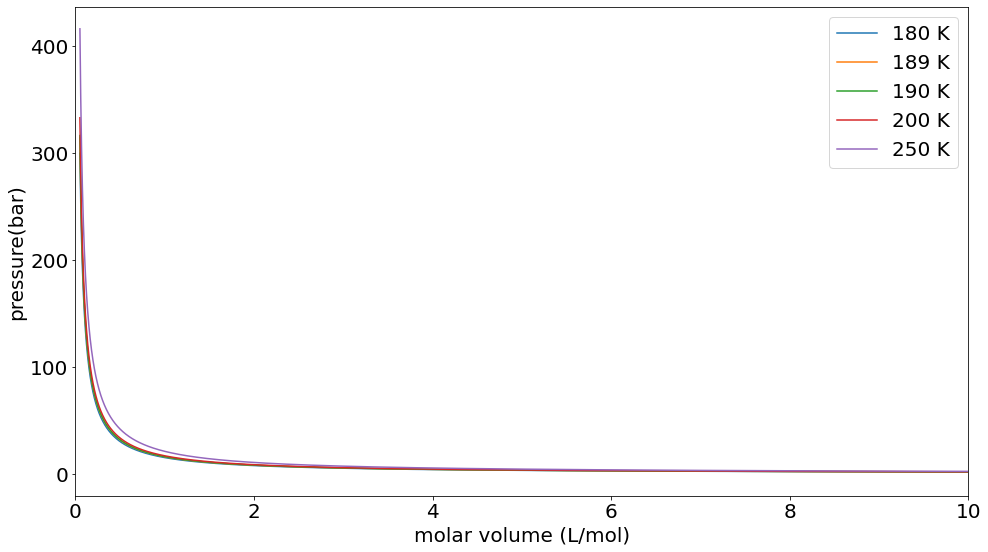

In [34]:
plt.figure(figsize=(16,9))
for T in Temps:
 pressures= PI(Vbars,T)
 plt.plot(Vbars,pressures, label=str(T)+' K')

plt.xlim(0,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("molar volume (L/mol)",fontsize=20)
plt.ylabel("pressure(bar)",fontsize=20)
plt.legend(fontsize=20)

Now! We are going to graph the compressibility factor for the ideal gas law equation. If everything is going well, we will see a straight line at Z=1 since we are dealing with ideal conditions! 

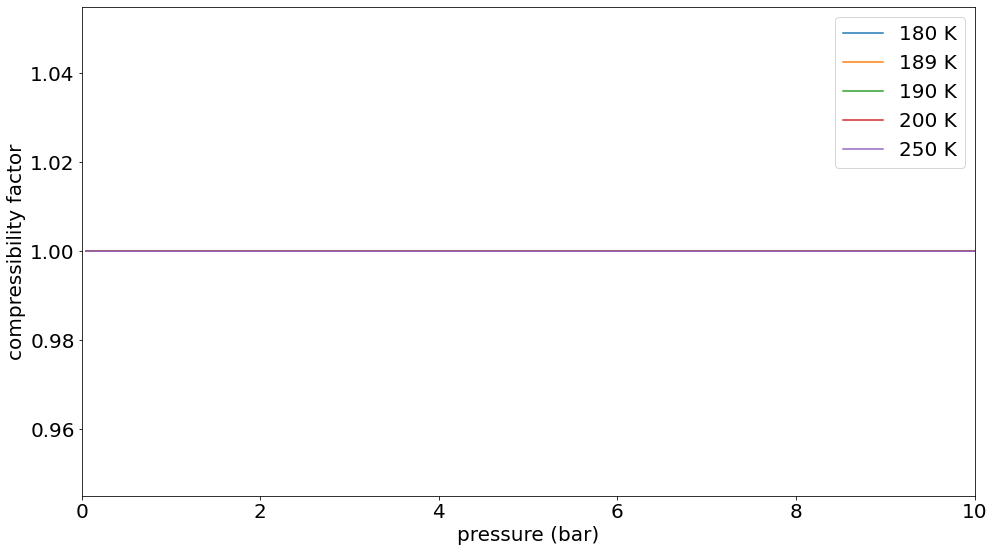

In [35]:
plt.figure(figsize=(16,9))
for T in Temps:
    plt.plot(Vbars,Z(PI(Vbars,T),Vbars,T), label=str(T)+' K')

plt.xlim(0,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("pressure (bar)",fontsize=20)
plt.ylabel("compressibility factor",fontsize=20)
plt.legend(fontsize=20)

To consider the Van Der Waal equation for compressibility, we first must create the constants for propane. And then, we have to refine pressure and Z as different functions.

We will redefine Pressure as a function of Vbar, and we will then redefine Z as a function of van der waals.

In [36]:
# van der waal constants for methane
a = 0
b = 0.01

In [37]:
def P_vdw(Vbar,T): # Van der Waal equations for Pressure and Z
    return ((R*T)/(Vbar-b))-(a/(Vbar**2))

def Z_vdw_bad(P,Vbar,T):
    return (P*(Vbar))/(R*T)

def Z_vdw_2(Vbar,T):
    return (Vbar/(Vbar-b)-a/(R*T*Vbar))

print(P_vdw(1,2))

0.16795959595959598


We use the same methodology above to graph Z vs. P as we did above! We then get the below graphs. 

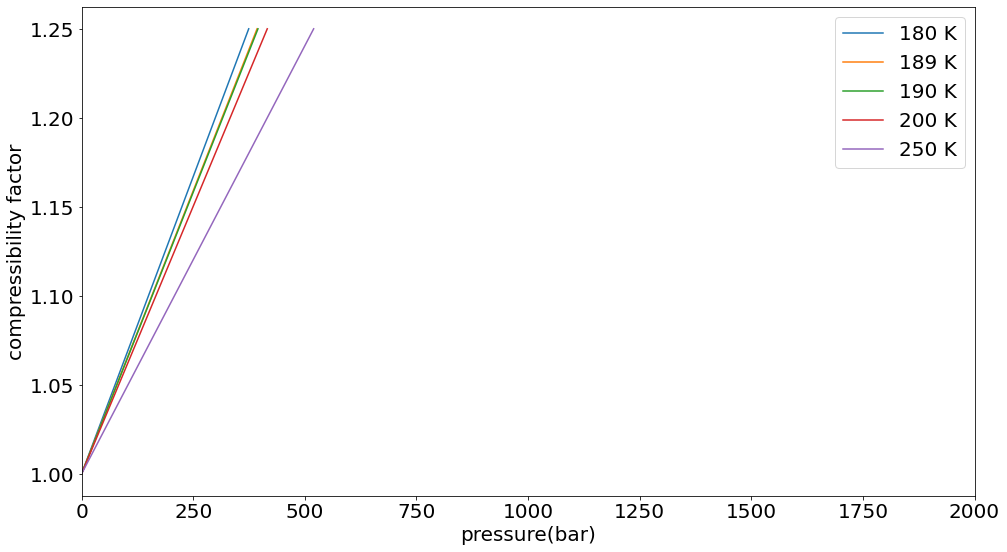

In [38]:
plt.figure(figsize=(16,9))
for T in Temps:
    plt.plot(P_vdw(Vbars,T),Z_vdw_bad(P_vdw(Vbars,T),Vbars,T), label=str(T)+' K')

plt.xlim(0,2000)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("pressure(bar)",fontsize=20)
plt.ylabel("compressibility factor",fontsize=20)
plt.legend(fontsize=20)